<a href="https://colab.research.google.com/github/anindya2001/GraphSemanticSegmentation/blob/main/MVSEC_extract_images_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image as im
import os
import cv2
import math
import scipy.io
import random
import networkx
import h5py
import numpy as np

In [ ]:
file_name = "/content/drive/MyDrive/hdf5/outdoor_day/outdoor_day2_data.hdf5"

f = h5py.File(file_name, "r")
for key in f.keys():
  print(key)

davis
velodyne
visensor


In [ ]:
davis = f['davis']
for key in davis.keys():
  print(key)

left
right


In [ ]:
left = davis['left']
for key in left.keys():
  print(key,end=' = ')
  print(len(left[str(key)]))

In [ ]:
events = left['events']
image_raw = left['image_raw']
image_raw_ts = left['image_raw_ts']
image_raw_event_inds = left['image_raw_event_inds']

In [ ]:
image_raw_sample = image_raw[1:101]
image_raw_event_inds_sample = image_raw_event_inds[1:101]
image_raw_ts_sample = image_raw_ts[1:101]

In [ ]:
image_raw_batch = np.asarray(image_raw_sample)
image_raw_ts_batch = np.asarray(image_raw_ts_sample)
image_raw_event_inds_batch = np.asarray(image_raw_event_inds_sample)

Each image is of the dimension 260 x 346

Each pixel has a gray value between [0,256)

In [ ]:
img = im.fromarray(image_raw_batch[0]);
image_raw_batch[0].shape

In [ ]:
image_raw_ts_batch[0],image_raw_ts_batch[1]

In [ ]:
image_raw_event_inds_batch[0], image_raw_event_inds_batch[1]

In [ ]:
A = image_raw_batch[0]
B = image_raw_batch[1]
(A==B).all()

In [ ]:
# for saving the batch of images. Do not run otherwise
#for i in range(100):
#  x = str(i//10)
#  y = str(i%10)
#  np.save(os.path.join('image_raw_batch_as_npy','image_raw_00'+x+y),image_raw_batch)
#  np.save(os.path.join('image_raw_ts_batch_as_npy','image_raw_ts_00'+x+y),image_raw_ts_batch)
#  np.save(os.path.join('image_raw_event_inds_batch_as_npy','image_raw_event_inds_00'+x+y),image_raw_event_inds_batch)

In [ ]:
# for creating a zip file. Do not run otherwise
# !zip -r image_raw_batch_as_npy.zip /content/image_raw_batch_as_npy
# !zip -r image_raw_event_inds_batch_as_npy.zip /content/image_raw_event_inds_batch_as_npy
# !zip -r image_raw_ts_batch_as_npy /content/image_raw_ts_batch_as_npy

In [ ]:
# for moving a file. Do not otherwise
# !mv /content/image_raw_batch_as_npy.zip /content/drive/MyDrive/Labelling_data

In [ ]:
# !mv /content/image_raw_event_inds_batch_as_npy.zip /content/drive/MyDrive/Labelling_data
# !mv /content/image_raw_ts_batch_as_npy.zip /content/drive/MyDrive/Labelling_data

In [ ]:

# stacked_img = np.stack((s,)*3, axis=-1)
# print(stacked_img.shape)

In [ ]:
"""for i in range(len(image_raw_batch)):
  gray = image_raw_batch[i]
  # convert 1 channel grayscale to 3 channel RGB grayscale
  gray_rgb = np.stack((gray,)*3, axis=-1)
  # convert to IMAGE
  img = im.fromarray(gray_rgb)
  # histogram equalization
  img_to_yuv = cv2.cvtColor(gray_rgb,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  x = str(i//10)
  y = str(i%10)
  np.save(os.path.join('/content/image_raw_batch_histeq_as_npy','image_raw_batch_histeq_0'+x+y),hist_equalization_result)"""

In [ ]:
# !zip -r image_raw_batch_histeq_as_npy.zip '/content/image_raw_batch_histeq_as_npy'

In [ ]:
# !mv /content/image_raw_batch_histeq_as_npy.zip /content/drive/MyDrive/Labelling_data

In [ ]:
"""for i in range(100):
  x = str(i//10)
  y = str(i%10)
  array = np.load('/content/image_raw_batch_histeq_as_npy/image_raw_batch_histeq_0'+x+y+'.npy')
  img = im.fromarray(array)
  img.save('/content/images_raw_batch_histeq/image_raw_batch_histeq_0'+x+y+'.png','PNG')"""

In [ ]:
#!zip -r images_raw_batch_histeq.zip '/content/images_raw_batch_histeq'

In [ ]:
#!mv /content/images_raw_batch_histeq.zip /content/drive/MyDrive/Labelling_data

In [ ]:
A = np.load('/content/image_raw_batch_histeq_as_npy/image_raw_batch_histeq_000.npy')
B = np.load('/content/image_raw_batch_histeq_as_npy/image_raw_batch_histeq_001.npy')

In [ ]:
np.array_equal(A,A), np.array_equal(A,B)

In [ ]:
print(image_raw_ts_batch[99],image_raw_ts_batch[0])

In [ ]:
for i in image_raw_event_inds_batch[:100]:
  print(i)

In [ ]:
last = 0
for ind in image_raw_event_inds_batch[:1]:
  x = '0000000000'
  y = str(ind)
  file_name = x[:len(x)-len(y)] + y
  np.save(os.path.join('/content','event_'+file_name),np.asarray(events[last:ind+1]))
  last = ind + 1

In [ ]:
#!unzip /content/drive/MyDrive/Labelling_data/events_batch_as_npy.zip

In [ ]:
# !mv /content/events_batch_as_npy.zip /content/drive/MyDrive/Labelling_data

In [ ]:
A = np.load('/content/content/events_batch_as_npy/event_0000000037.npy')
A[:10]

In [ ]:
#!unzip /content/drive/MyDrive/Labelling_data/image_raw_batch_seg_as_npy.zip -d '/content/Untitled Folder'

In [ ]:
#!mv '/content/Untitled Folder/content/image_raw_batch_seg_as_npy' /content

**Each event is of the form (y_i, x_i, t_i, p_i)**

In [ ]:
I = np.load('/content/image_raw_batch_seg_as_npy/image_raw_batch_seg_as_npy_000.npy')
print(I.shape)  # rows, cols 
imgI = im.fromarray(I)
print(imgI.size)  # width, height

(260, 346, 3)
(346, 260)


In [ ]:
#color_to_object[tuple(I[114][40])]

In [ ]:
object_to_color = {
    "background"  : (0, 0, 0),
    "person"      : (192, 128, 128),
    "car"         : (128, 128, 128)
}
color_to_object = { v : k for k, v in object_to_color.items()}

In [ ]:
events = np.load('/content/content/events_batch_as_npy/event_0000000037.npy');
no_events = len(events)

In [ ]:
for event in events:
 y, x, t, p = event 
 print(color_to_object[tuple(I[int(x)][int(y)])])

#Classification
Background -or- Car -or- Person


In [ ]:
def label_data(events):
  object_to_color = {
    "background"  : (0, 0, 0),
    "person"      : (192, 128, 128),
    "car"         : (128, 128, 128)
  }
  color_to_object = { v : k for k, v in object_to_color.items()}
  GT = []
  for event in events:
    y, x, t, p = event
    if color_to_object[tuple(I[int(x)][int(y)])] == "person":
      GT.append(list((0, 0, 1)))
      continue
    elif color_to_object[tuple(I[int(x)][int(y)])] == "car":
      GT.append(list((0, 1, 0)))
      continue
    GT.append(list((1, 0, 0)))
  return np.array(GT)

In [ ]:
print(class_tensor(events))

In [ ]:
def isWithin(event1, event2, radius, alpha=1, beta=0.000005):
    y_i, x_i, t_i, p_i = event1
    y_j, x_j, t_j, p_j = event2
    t_i = t_i/10000
    t_j = t_j/10000
    spatial = (x_i - x_j)*(x_i - x_j) + (y_i - y_j)*(y_i - y_j)
    temporal = (t_i - t_j)*(t_i - t_j)
    if (alpha * spatial) + (beta * temporal * 100000000) >= 0:
      #print(math.sqrt(alpha * spatial + beta * temporal))
      return math.sqrt(alpha * spatial + beta * temporal) <= radius

In [ ]:
def visualize_graph(adMat):
  M = len(adMat)
  labeldict = {}
  for i in range(M):
    labeldict[i] = str(i) + "+" if events[i][3] == 1 else str(i) +"-"
    
  G = networkx.from_numpy_matrix(np.array(adMat))

  color_map = []
  for node in G:
    if events[node][3] == -1:
      color_map.append("red")
    else:
      color_map.append("green")
  networkx.draw(G,node_color=color_map, labels = labeldict, with_labels=True)

In [ ]:
def construct_graph(events, R = 10):
  M = len(events)
  adMat = np.zeros([M, M], dtype=int)
  for row in range(M):
      for col in range(M):
        if row == col:
          continue 
        if isWithin(events[row], events[col], R):
          adMat[row][col] = 1
          adMat[col][row] = 1
  return adMat

In [ ]:
def polar_events(events):
  return events[:,-1]

In [ ]:
construct_graph(events)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

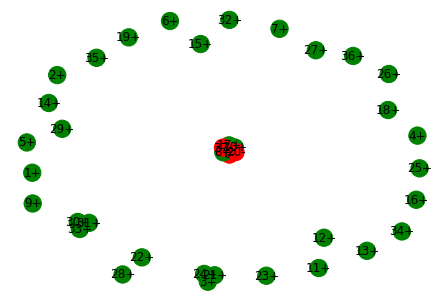

In [ ]:
visualize_graph(construct_graph(events))

In [ ]:
label_data(events)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
polar_events(events)

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])